# Showing Images

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
#import sys             
#print('\n'.join(sys.path))
#pip list"    

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


# Reading the images from files

In [2]:
#Let's import OpenCV module
import cv2

#Now we'll specify the path to our image
image_path = 'data/test.jpg'

#We'll use OpenCV's built-in function 'imread' to read the image
#Specify the image_path in the imread function
image = cv2.imread(image_path)

#If image is loaded successfully
#Go ahead and print the details
if image is not None:
    print('Image Loaded Successfully')

print_image('image','image',image,0,1,0,10)

Image Loaded Successfully
image
  Shape: (507, 639, 3)   Data type: uint8
[ [ 61 104 121] [ 64 107 124] [ 68 111 128] [ 71 114 131] [ 73 116 133] [ 73 116 133] [ 74 116 135] [ 75 117 136] [ 77 119 138] [ 77 119 138] ]  image: uint8


### Showing Images on Screen

original image(507, 639, 3)
  Shape: (507, 639, 3)   Data type: uint8
[ [ 61 104 121] [ 64 107 124] [ 68 111 128] [ 71 114 131] [ 73 116 133] [ 73 116 133] [ 74 116 135] [ 75 117 136] ]  image: uint8
image_right_restored
  Shape: (507, 639, 3)   Data type: uint8
[ [ 63 107 124] [ 64 108 125] [ 67 111 128] [ 71 114 131] [ 72 115 133] [ 73 116 134] [ 74 116 135] [ 75 117 136] [ 76 119 138] [ 77 119 139] ]  image_right_restored: uint8
image_resized = cv2.resize(image_copy, (256, 256))
  Shape: (256, 256, 3)   Data type: uint8
[ [ 63 107 124] [ 72 115 132] [ 74 116 135] [ 77 119 138] [ 79 121 140] [ 79 120 142] [ 78 119 138] [ 78 118 136] [ 78 118 136] [ 77 118 133] ]  image_resized: uint8
image_resized_restored
  Shape: (639, 507, 3)   Data type: uint8
[ [ 63 107 124] [ 65 109 126] [ 70 113 130] [ 72 115 133] [ 73 116 134] [ 75 117 136] [ 76 118 137] [ 78 119 139] [ 79 120 139] [ 79 121 140] ]  image_resized_restored: uint8


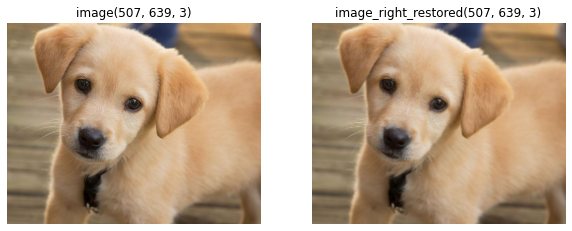

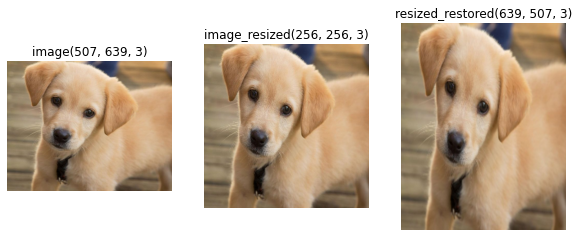

In [3]:
#void resize(InputArray src, OutputArray dst, Size dsize, double fx=0, double fy=0, int interpolation=INTER_LINEAR )

image_resized = cv2.resize(image, (256, 256))
image_resized_restored = cv2.resize(cv2.resize(image, (256, 256)), image.shape[0:2])
image_right_restored = cv2.resize(cv2.resize(image, (256, 256)), image.shape[0:2][::-1])


###########################################################
print_image('original image'+str(image.shape),'image',image,0,1,0,8)
print_image('image_right_restored','image_right_restored',image_right_restored,0,1,0,10)
print_image('image_resized = cv2.resize(image_copy, (256, 256))','image_resized',image_resized,0,1,0,10)
print_image('image_resized_restored','image_resized_restored',image_resized_restored,0,1,0,10)

plt.figure(figsize=(10,6))
plt_view_image(plt,[["image"+str(image.shape),image[:,:,[2,1,0]] ], 
                    ["image_right_restored"+str(image_right_restored.shape),image_right_restored[:,:,[2,1,0]]  ]
                   ])
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image"+str(image.shape),image[:,:,[2,1,0]] ], 
                    ["image_resized"+str(image_resized.shape),image_resized[:,:,[2,1,0]] ],
                    ["resized_restored"+str(image_resized_restored.shape),image_resized_restored[:,:,[2,1,0]]  ]
                   ])
# By default, the flag is cv2.WINDOW_AUTOSIZE
# But if you specify flag to be cv2.WINDOW_NORMAL, 
# then you can resize window
#cv2.namedWindow('original image', cv2.WINDOW_NORMAL)
cv2.imshow('original image, image right restored', np.hstack([image,image_right_restored]))
cv2.imshow("resized", image_resized)
cv2.imshow("downsized&restored", image_resized_restored)
cv2.waitKey(0)
cv2.destroyAllWindows()